# a)


In [66]:
%matplotlib inline
import numpy as np
import pandas as pd
import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display
from sklearn import model_selection,preprocessing, metrics

from grafica import *
from ClassNeuronaLineal import NeuronaLineal

In [67]:
datos= pd.read_csv('../../Datos/automobile-simple.csv')
print(datos.sample(15))
print(datos['price'].isna().sum())

              make fuel-type num-of-doors body-style  curb-weight  \
127        porsche       gas          two    hardtop         2756   
141         subaru       gas         four      sedan         2145   
50           mazda       gas          two  hatchback         1890   
39           honda       gas         four      sedan         2304   
10             bmw       gas          two      sedan         2395   
112         peugot    diesel         four      sedan         3252   
41           honda       gas         four      sedan         2465   
69   mercedes-benz    diesel          two    hardtop         3495   
91          nissan       gas          two      sedan         1918   
121       plymouth       gas         four      sedan         1989   
35           honda       gas         four      sedan         2010   
181         toyota       gas         four      wagon         3151   
54           mazda       gas         four      sedan         1950   
60           mazda       gas      

In [68]:
price_promedio = datos["price"].mean()
print(price_promedio)

13207.129353233831


In [69]:
datos["price"] = datos["price"].fillna(price_promedio)
print(datos['price'].isna().sum())

0


In [70]:
T = np.array(datos['price'])
X = np.array(datos['engine-size'])
X = X.reshape(-1,1)
T = T.reshape(-1,1)

normalizar = 1
if normalizar:
    normalizador= preprocessing.MinMaxScaler()
    #normalizador= preprocessing.StandardScaler() #media y desvío
    X = normalizador.fit_transform(X)
    T = normalizador.fit_transform(T)
    
print(X)
print(T)

[[0.26037736]
 [0.26037736]
 [0.34339623]
 [0.18113208]
 [0.28301887]
 [0.28301887]
 [0.28301887]
 [0.28301887]
 [0.26415094]
 [0.26415094]
 [0.17735849]
 [0.17735849]
 [0.38867925]
 [0.38867925]
 [0.38867925]
 [0.55849057]
 [0.55849057]
 [0.55849057]
 [0.        ]
 [0.10943396]
 [0.10943396]
 [0.10943396]
 [0.10943396]
 [0.13962264]
 [0.10943396]
 [0.10943396]
 [0.10943396]
 [0.13962264]
 [0.23018868]
 [0.35849057]
 [0.11698113]
 [0.11698113]
 [0.06792453]
 [0.11698113]
 [0.11698113]
 [0.11698113]
 [0.11698113]
 [0.18490566]
 [0.18490566]
 [0.18490566]
 [0.18490566]
 [0.18490566]
 [0.18490566]
 [0.18867925]
 [0.10943396]
 [0.10943396]
 [0.21886792]
 [0.74339623]
 [0.74339623]
 [1.        ]
 [0.11320755]
 [0.11320755]
 [0.11320755]
 [0.11320755]
 [0.11320755]
 [0.03396226]
 [0.03396226]
 [0.03396226]
 [0.07169811]
 [0.23018868]
 [0.23018868]
 [0.23018868]
 [0.23018868]
 [0.23018868]
 [0.23018868]
 [0.29811321]
 [0.2754717 ]
 [0.46037736]
 [0.46037736]
 [0.46037736]
 [0.46037736]
 [0.65

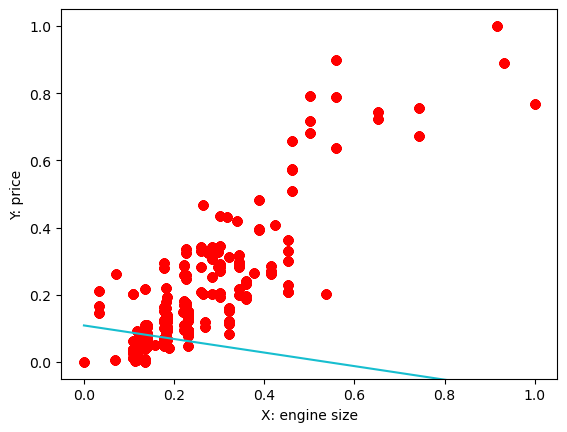

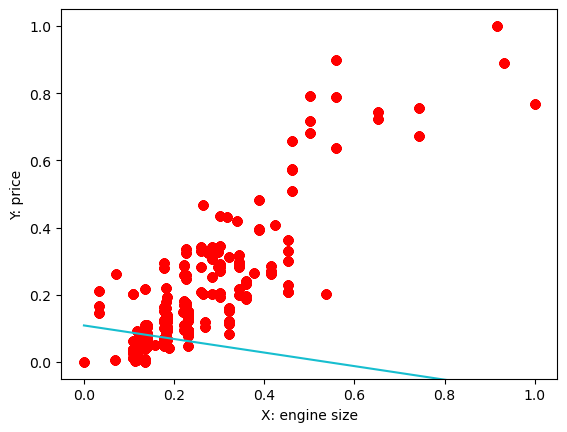

In [71]:
nl = NeuronaLineal(alpha=0.0001, n_iter=50, cotaE=10e-06, draw=1, title=['X: engine size', 'Y: price'])
# --- utilice random_state=None para que los pesos se inicializacen en forma aleatoria --
nl.fit(X, T)

In [72]:
print("W = ", nl.w_)
print("b = ", nl.b_)

W =  [-0.20182885]
b =  [0.10857079]


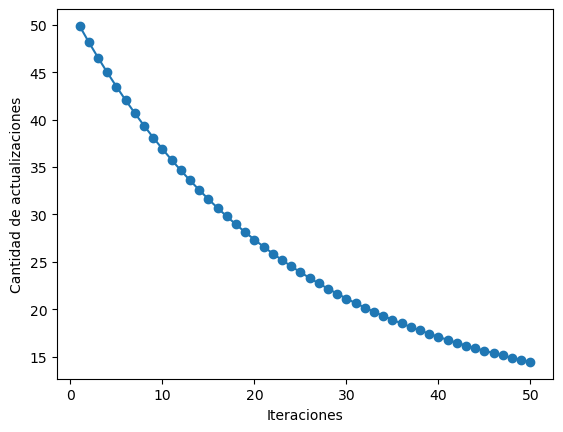

In [73]:
plt.plot(range(1, len(nl.errors_) + 1), nl.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

# Conclusiones:
- sin normalizar los números de actualizaciones crecían a medida que avanzábamos en las iteraciones. La recta obtenida no fue representativa
- al normalizar entre 0 y 1 la gráfica fue más o menos representativa y cada vez el modelo hacía menos actualizaciones. Parece que no modifica bien la pendiente, solo la ordenada al origen
- al normalizar con la media y desvío parece que tuve los mejores resultados